Labels: ['Normal', 'Tumor']
Found 8000 images belonging to 2 classes.
534/534 [==============================] - 258s 481ms/step
Class indices: {'Normal': 0, 'Tumor': 1}
Classes: ['Normal', 'Tumor']

--- Correctly Classified Images ---


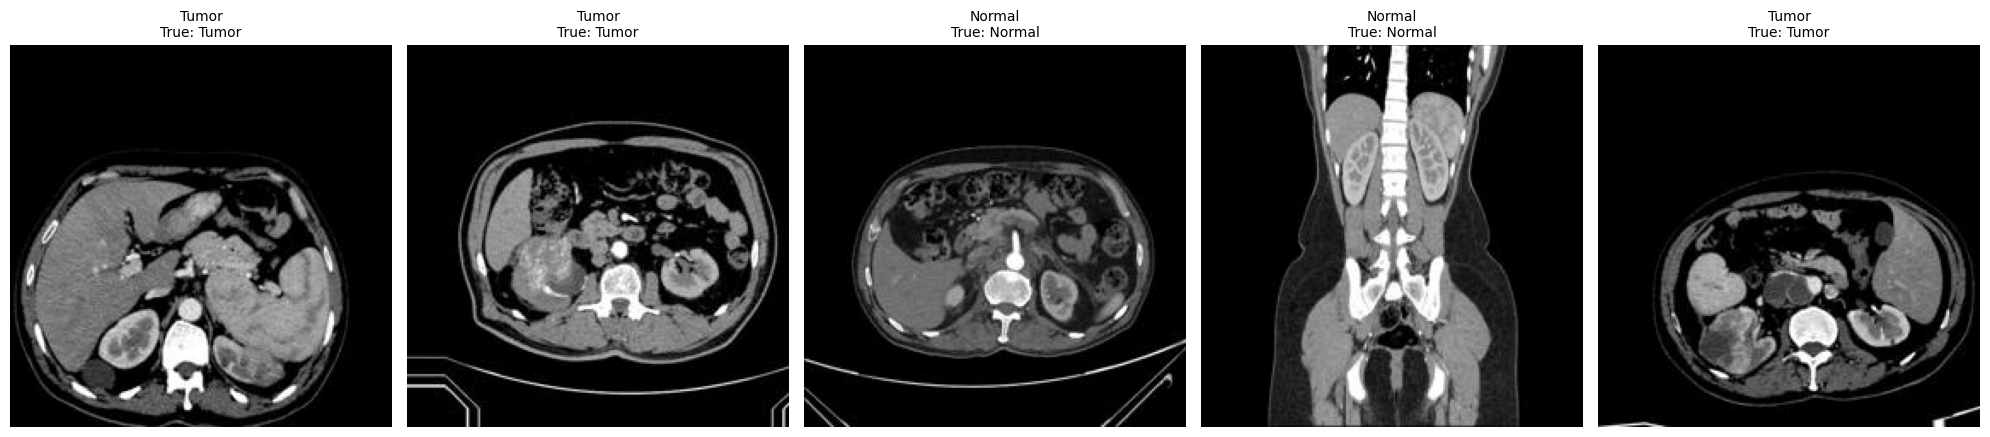


--- Misclassified Images ---


<Figure size 2000x500 with 0 Axes>

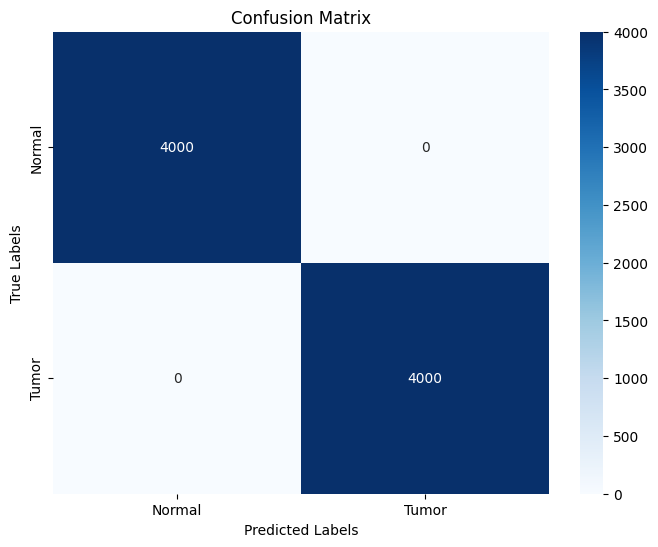


Accuracy: 1.00

Per-class Precision, Recall, and F1-score:
Class 'Normal':
  Precision: 1.00
  Recall:    1.00
  F1-score:  1.00
Class 'Tumor':
  Precision: 1.00
  Recall:    1.00
  F1-score:  1.00

Overall F1 Score (weighted): 1.00

Classification Report:
              precision    recall  f1-score   support

      Normal       1.00      1.00      1.00      4000
       Tumor       1.00      1.00      1.00      4000

    accuracy                           1.00      8000
   macro avg       1.00      1.00      1.00      8000
weighted avg       1.00      1.00      1.00      8000



In [1]:
import tensorflow as tf
import numpy as np
from sklearn.metrics import (
    confusion_matrix,
    f1_score,
    precision_score,
    recall_score,
    classification_report,
    roc_curve,
    auc
)
import os
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.preprocessing import label_binarize
from PIL import Image
import random

# Function to display images
def display_images(images, titles, annotations, cols=5, figsize=(20, 10)):

    assert len(images) == len(titles) == len(annotations), "All input lists must have the same length."
    rows = len(images) // cols + int(len(images) % cols != 0)
    plt.figure(figsize=figsize)
    for i in range(len(images)):
        plt.subplot(rows, cols, i + 1)
        if isinstance(images[i], str):
            img = Image.open(images[i])
        else:
            img = images[i]
        plt.imshow(img)
        plt.axis('off')
        plt.title(f"{titles[i]}\n{annotations[i]}", fontsize=10)
    plt.tight_layout()
    plt.show()

# Load the saved model
model_path = 'Trained_models/LastModel.h5'  # Path to your model
model = tf.keras.models.load_model(model_path)

# Get the testing dataset directory
test_dir = 'Datasets/Val'  # Path to your validation dataset

# Get the labels from the testing folder names
labels = os.listdir(test_dir)
labels.sort()  # Ensure consistent order
print('Labels:', labels)

# Create the testing dataset using ImageDataGenerator
test_datagen = ImageDataGenerator()
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(128, 128),
    batch_size=15,
    class_mode='categorical',
    shuffle=False
)

# Get the predicted classes for the testing dataset
predictions = model.predict(test_generator)
predicted_classes = np.argmax(predictions, axis=1)

# Get the true classes for the testing dataset
true_classes = test_generator.classes

# Ensure that labels correspond to class indices
class_indices = test_generator.class_indices
sorted_class_indices = sorted(class_indices.items(), key=lambda x: x[1])
classes = [k for k, v in sorted_class_indices]
print('Class indices:', class_indices)
print('Classes:', classes)

# One-hot encode the true classes for ROC curve
true_classes_one_hot = label_binarize(true_classes, classes=list(range(len(classes))))

# ------------------ Image Display Functionality ------------------

# Get filenames and paths to images
filenames = test_generator.filenames
image_paths = [os.path.join(test_dir, fname) for fname in filenames]

# Identify correctly and incorrectly classified indices
correct_indices = np.where(predicted_classes == true_classes)[0]
incorrect_indices = np.where(predicted_classes != true_classes)[0]

# Number of images to display
num_correct = 5
num_incorrect = 5

# Randomly select images to display
if len(correct_indices) >= num_correct:
    selected_correct = np.random.choice(correct_indices, num_correct, replace=False)
else:
    selected_correct = correct_indices

if len(incorrect_indices) >= num_incorrect:
    selected_incorrect = np.random.choice(incorrect_indices, num_incorrect, replace=False)
else:
    selected_incorrect = incorrect_indices

# Prepare data for correct predictions
correct_images = [image_paths[idx] for idx in selected_correct]
correct_titles = [classes[predicted_classes[idx]] for idx in selected_correct]
correct_annotations = [f"True: {classes[true_classes[idx]]}" for idx in selected_correct]

# Prepare data for incorrect predictions
incorrect_images = [image_paths[idx] for idx in selected_incorrect]
incorrect_titles = [classes[predicted_classes[idx]] for idx in selected_incorrect]
incorrect_annotations = [f"True: {classes[true_classes[idx]]}" for idx in selected_incorrect]

# Display Correctly Classified Images
print("\n--- Correctly Classified Images ---")
display_images(correct_images, correct_titles, correct_annotations, cols=5, figsize=(20, 5))

# Display Misclassified Images
print("\n--- Misclassified Images ---")
display_images(incorrect_images, incorrect_titles, incorrect_annotations, cols=5, figsize=(20, 5))

# ------------------ Performance Metrics and Plots ------------------

# Create the confusion matrix
cm = confusion_matrix(true_classes, predicted_classes)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=classes, yticklabels=classes)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Calculate and print accuracy
accuracy = np.sum(np.diag(cm)) / np.sum(cm)
print(f'\nAccuracy: {accuracy:.2f}')

# Calculate precision, recall, and F1-score for each class
precision_per_class = precision_score(true_classes, predicted_classes, average=None)
recall_per_class = recall_score(true_classes, predicted_classes, average=None)
f1_per_class = f1_score(true_classes, predicted_classes, average=None)

print("\nPer-class Precision, Recall, and F1-score:")
for i, label in enumerate(classes):
    print(f"Class '{label}':")
    print(f"  Precision: {precision_per_class[i]:.2f}")
    print(f"  Recall:    {recall_per_class[i]:.2f}")
    print(f"  F1-score:  {f1_per_class[i]:.2f}")

# Print overall F1 Score
overall_f1 = f1_score(true_classes, predicted_classes, average='weighted')
print(f"\nOverall F1 Score (weighted): {overall_f1:.2f}")

# Print a detailed classification report
print("\nClassification Report:")
print(classification_report(true_classes, predicted_classes, target_names=classes))


precision_per_class = precision_score(true_classes, predicted_classes, average=None)
recall_per_class = recall_score(true_classes, predicted_classes, average=None)
f1_per_class = f1_score(true_classes, predicted_classes, average=None)

Interpretation of Metrics :
Precision measures how many of the positive predictions were correct.
Recall measures how many actual positives were correctly predicted.
F1-score is the harmonic mean of precision and recall, providing a balance between the two.
Classification Report :
The classification report provides precision, recall, F1-score, and support (number of true instances) for each class in a formatted table.
ROC Curves :
ROC curves for multi-class problems are computed in a one-vs-rest fashion.
The Area Under the Curve (AUC) provides an aggregate measure of performance across all classification thresholds.